## 1) Opening data and examining metadata
1.1) Open the dataset and display its contents
1.2) Print out the long_name attribute of each variable
Print variable: long name for each variable. Format the output so that the start of the long name attributes are aligned.

In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import pooch

In [2]:
fname = '/data9/GR6901/data/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc'
ds=xr.open_dataset(fname)
print(ds)

ERROR 1: PROJ: proj_create_from_database: Open of /opt/sw/anaconda3/2023.09/envs/pangeo23/share/proj failed


<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat,

In [3]:
print("Variable: Long Name")
for var_name, var in ds.variables.items():
    long_name = var.attrs.get('long_name', 'N/A')
    print(f"{var_name}: {long_name}")

Variable: Long Name
lon: longitude
toa_sw_all_mon: Top of The Atmosphere Shortwave Flux, Monthly Means, All-Sky conditions
toa_lw_all_mon: Top of The Atmosphere Longwave Flux, Monthly Means, All-Sky conditions
toa_net_all_mon: Top of The Atmosphere Net Flux, Monthly Means, All-Sky conditions
toa_sw_clr_mon: Top of The Atmosphere Shortwave Flux, Monthly Means, Clear-Sky conditions
toa_lw_clr_mon: Top of The Atmosphere Longwave Flux, Monthly Means, Clear-Sky conditions
toa_net_clr_mon: Top of The Atmosphere Net Flux, Monthly Means, Clear-Sky conditions
toa_cre_sw_mon: Top of The Atmosphere Cloud Radiative Effects Shortwave Flux, Monthly Means
toa_cre_lw_mon: Top of The Atmosphere Cloud Radiative Effects Longwave Flux, Monthly Means
toa_cre_net_mon: Top of The Atmosphere Cloud Radiative Effects Net Flux, Monthly Means
solar_mon: Incoming Solar Flux, Monthly Means
cldarea_total_daynight_mon: Cloud Area Fraction, Monthly Means, Daytime-and-Nighttime conditions
cldpress_total_daynight_mon: C

In [4]:
max_var_len = max(len(var_name) for var_name in ds.variables)
print("Variable:".ljust(max_var_len + 2), "Long Name")
for var_name, var in ds.variables.items():
    long_name = var.attrs.get('long_name', 'N/A')
    print(f"{var_name.ljust(max_var_len + 2)} {long_name}")

Variable:                     Long Name
lon                           longitude
toa_sw_all_mon                Top of The Atmosphere Shortwave Flux, Monthly Means, All-Sky conditions
toa_lw_all_mon                Top of The Atmosphere Longwave Flux, Monthly Means, All-Sky conditions
toa_net_all_mon               Top of The Atmosphere Net Flux, Monthly Means, All-Sky conditions
toa_sw_clr_mon                Top of The Atmosphere Shortwave Flux, Monthly Means, Clear-Sky conditions
toa_lw_clr_mon                Top of The Atmosphere Longwave Flux, Monthly Means, Clear-Sky conditions
toa_net_clr_mon               Top of The Atmosphere Net Flux, Monthly Means, Clear-Sky conditions
toa_cre_sw_mon                Top of The Atmosphere Cloud Radiative Effects Shortwave Flux, Monthly Means
toa_cre_lw_mon                Top of The Atmosphere Cloud Radiative Effects Longwave Flux, Monthly Means
toa_cre_net_mon               Top of The Atmosphere Cloud Radiative Effects Net Flux, Monthly Means
solar

## 2) Basic reductions, arithmetic, and plotting
2.1) Calculate the time-mean of the entire datasetable.

In [5]:
ds_mean = ds.mean(dim='time')
ds_mean

<xarray.Dataset>
Dimensions:                      (lon: 360, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (lat, lon) float32 122.3 122.3 ... 104.4 104.4
    toa_lw_all_mon               (lat, lon) float32 141.1 141.1 ... 194.1 194.1
    toa_net_all_mon              (lat, lon) float32 -91.29 -91.29 ... -126.3
    toa_sw_clr_mon               (lat, lon) float32 119.9 119.9 ... 89.47 89.47
    toa_lw_clr_mon               (lat, lon) float32 140.2 140.2 ... 200.4 200.4
    toa_net_clr_mon              (lat, lon) float32 -88.03 -88.03 ... -117.6
    ...                           ...
    toa_cre_net_mon              (lat, lon) float32 -3.253 -3.251 ... -8.651
    solar_mon                    (lat, lon) float32 172.1 172.1 ... 172.3 172.3
    cldarea_total_daynight_mon   (lat, lon) float32 51.52 51.52 ... 78.93 78.93
    cldpress_total_daynight_mon  (lat, lon) float32 486.5 486.5 ... 766.9 766.9
    cldtemp_total_daynight_mon   (lat, lon) float32 225.2 225.2 ... 247.9 247.9
    cldtau_total_day_mon         (lat, lon) float32 4.158 4.158 ... 4.821 4.821

## 2.2 From this, make a 2D plot of the the time-mean Top of Atmosphere (TOA) Longwave, Shortwave, and Incoming Solar Radiation
(Use “All-Sky” conditions)
Note the sign conventions on each variable.

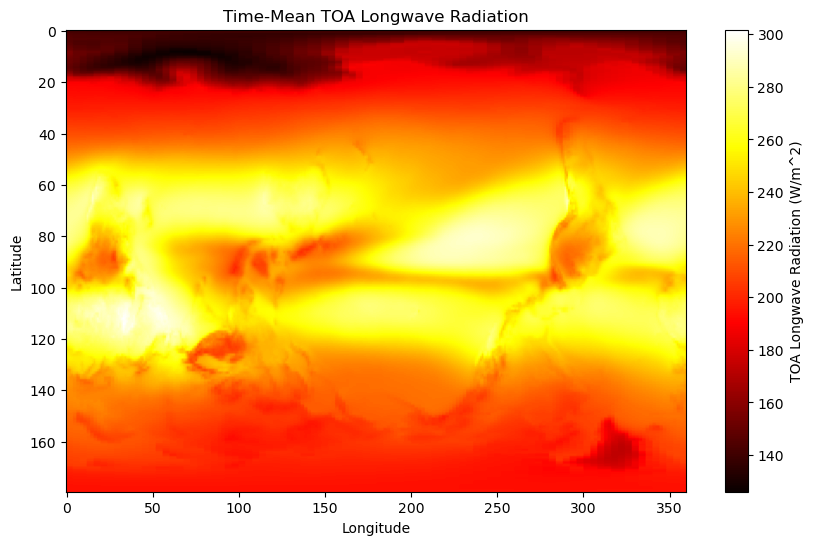

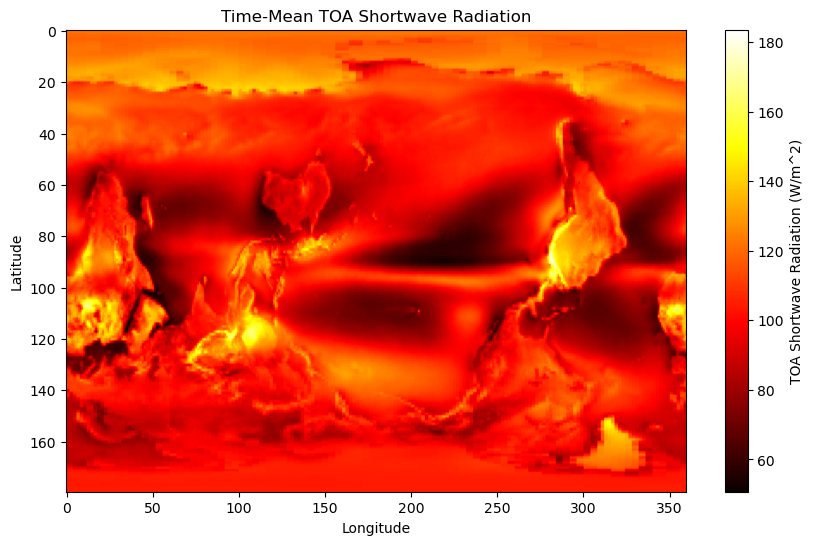

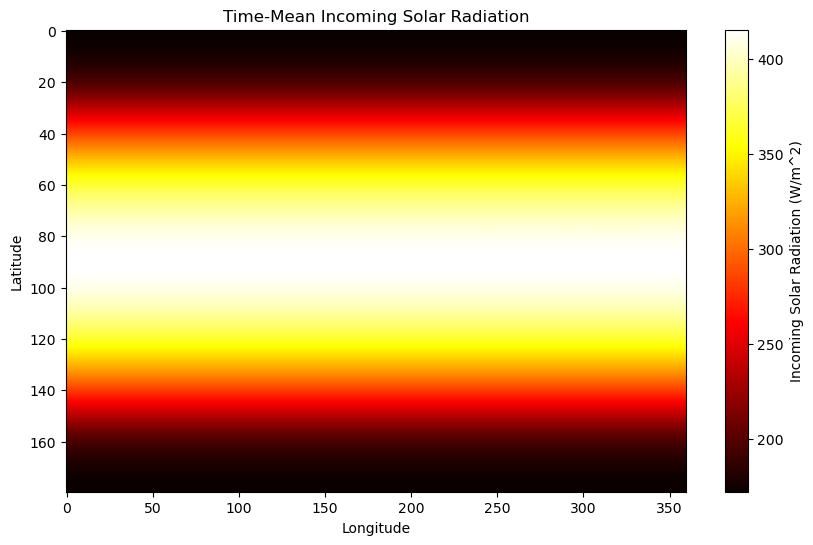

In [6]:
plt.figure(figsize=(10, 6))
plt.imshow(ds_mean['toa_lw_all_mon'], cmap='hot', aspect='auto')
plt.colorbar(label='TOA Longwave Radiation (W/m^2)')
plt.title('Time-Mean TOA Longwave Radiation')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Plot TOA Shortwave Radiation
plt.figure(figsize=(10, 6))
plt.imshow(ds_mean['toa_sw_all_mon'], cmap='hot', aspect='auto')
plt.colorbar(label='TOA Shortwave Radiation (W/m^2)')
plt.title('Time-Mean TOA Shortwave Radiation')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Plot Incoming Solar Radiation
plt.figure(figsize=(10, 6))
plt.imshow(ds_mean['solar_mon'], cmap='hot', aspect='auto')
plt.colorbar(label='Incoming Solar Radiation (W/m^2)')
plt.title('Time-Mean Incoming Solar Radiation')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


## 2.3) Add up the three variables above and verify (visually) that they are equivalent to the TOA net flux
You have to pay attention to and think carefully about the sign conventions (positive or negative) for each variable in order for the variables to sum to the right TOA net flux. Refer to the NASA figure at the top of the page to understand incoming and outgoing radiation.

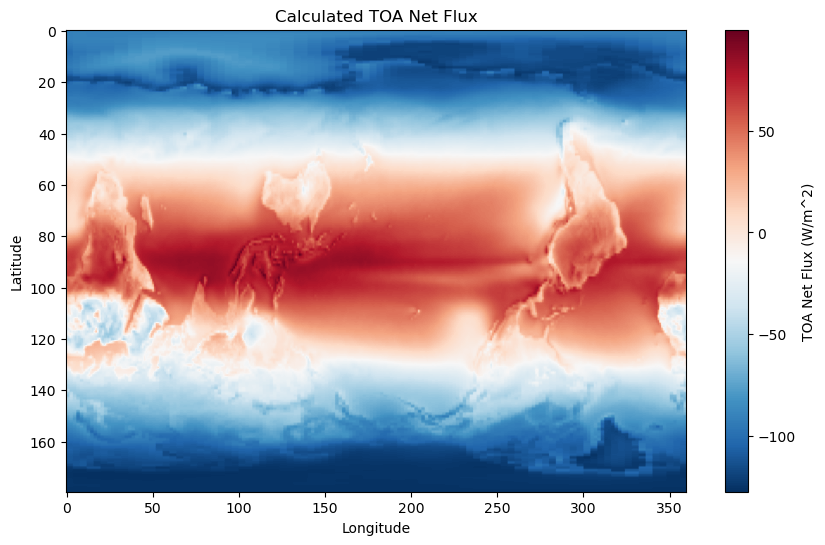

In [7]:
toa_net_flux_calculated = -ds_mean['toa_lw_all_mon'] - ds_mean['toa_sw_all_mon'] + ds_mean['solar_mon']
# Visualize the calculated TOA net flux
plt.figure(figsize=(10, 6))
plt.imshow(toa_net_flux_calculated, cmap='RdBu_r', aspect='auto')
plt.colorbar(label='TOA Net Flux (W/m^2)')
plt.title('Calculated TOA Net Flux')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

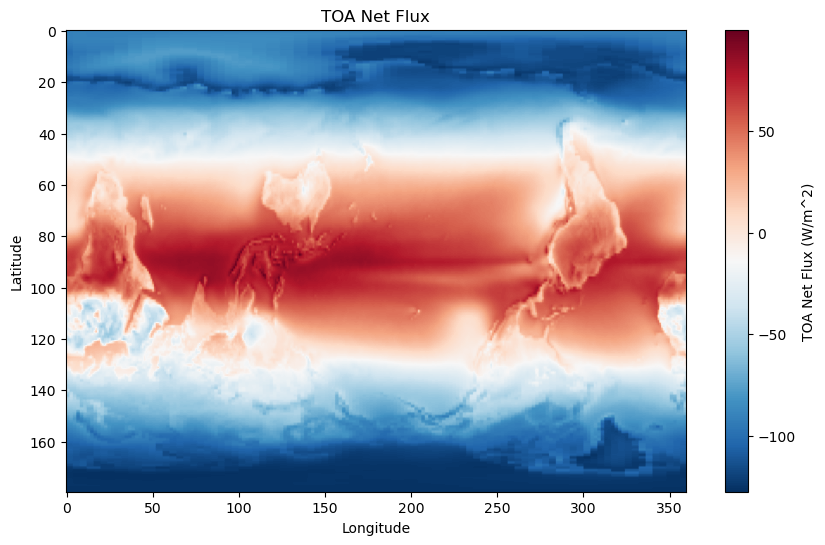

In [8]:
plt.figure(figsize=(10, 6))
plt.imshow(ds_mean['toa_net_all_mon'], cmap='RdBu_r', aspect='auto')
plt.colorbar(label='TOA Net Flux (W/m^2)')
plt.title('TOA Net Flux')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## 3) Mean and weighted mean
3.1) Calculate the global (unweighted) mean of TOA net radiation
Since the Earth is approximately in radiative balance, the net TOA radiation should be zero. But taking the naive mean from this dataset, you should find a number far from zero. Wh 

The answer is that each “pixel” or “grid point” of this dataset does not represent an equal area of Earth’s surface. So naively taking the mean, i.e. giving equal weight to each point, gives the wrong ans r.

On a lat / lon grid, the relative area of each grid point is proportionl t 
. (
 is latitude)

In [9]:
# global unweighted mean  = gum
gum= ds_mean.toa_net_all_mon.mean(dim=['lat','lon'])
gum

<xarray.DataArray 'toa_net_all_mon' ()>
array(-28.729012, dtype=float32)

## 3.2) Create a weight array proportional to cos lambda
Think carefully a about radians vs. degrees

In [10]:
timemean=ds_mean.assign(earth_angle=lambda ds_mean: (0*ds_mean.lon)+np.cos(np.deg2rad(ds_mean.lat)))
timemean

<xarray.Dataset>
Dimensions:                      (lon: 360, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/15)
    toa_sw_all_mon               (lat, lon) float32 122.3 122.3 ... 104.4 104.4
    toa_lw_all_mon               (lat, lon) float32 141.1 141.1 ... 194.1 194.1
    toa_net_all_mon              (lat, lon) float32 -91.29 -91.29 ... -126.3
    toa_sw_clr_mon               (lat, lon) float32 119.9 119.9 ... 89.47 89.47
    toa_lw_clr_mon               (lat, lon) float32 140.2 140.2 ... 200.4 200.4
    toa_net_clr_mon              (lat, lon) float32 -88.03 -88.03 ... -117.6
    ...                           ...
    solar_mon                    (lat, lon) float32 172.1 172.1 ... 172.3 172.3
    cldarea_total_daynight_mon   (lat, lon) float32 51.52 51.52 ... 78.93 78.93
    cldpress_total_daynight_mon  (lat, lon) float32 486.5 486.5 ... 766.9 766.9
    cldtemp_total_daynight_mon   (lat, lon) float32 225.2 225.2 ... 247.9 247.9
    cldtau_total_day_mon         (lat, lon) float32 4.158 4.158 ... 4.821 4.821
    earth_angle                  (lon, lat) float32 0.008727 ... 0.008727

## 3.3) Redo your global mean TOA net radiation calculation with this weight factor
Use xarray’s weighted array reductions to compute the weighted mean.

This time around, you should have found something much closer to zero. Ask a climate scientist what the net energy imbalance of Earth due to global warming is estimated to be. Do you think our calculation is precise enough to detect this?

In [11]:
#netrad= net radiation 
netrad=timemean.toa_net_all_mon
weights=timemean.earth_angle

weighted_netrad=netrad.weighted(weights)
print(weighted_netrad.mean())

<xarray.DataArray 'toa_net_all_mon' ()>
array(0.8780836, dtype=float32)


## 3.4) Now that you have a weight factor, verify that the TOA incoming solar, outgoing longwave, and outgoing shortwave approximately match up with infographic shown in the first cell of this assignment.

In [12]:
weighted_lw=timemean.toa_lw_all_mon.weighted(weights).mean()
weighted_sw=timemean.toa_sw_all_mon.weighted(weights).mean()
weighted_incom=timemean.solar_mon.weighted(weights).mean()

print(weighted_lw)
print(weighted_sw)
print(weighted_incom)

<xarray.DataArray 'toa_lw_all_mon' ()>
array(240.2667, dtype=float32)
<xarray.DataArray 'toa_sw_all_mon' ()>
array(99.13859, dtype=float32)
<xarray.DataArray 'solar_mon' ()>
array(340.28354, dtype=float32)


## incoming solar radiation = 340.4 my value is 340.3
## TOA outgoing longwave = 239.9  my vauue is 240.3
## TOA outgoing shortwave = 99.9 my value is 99.2

## 4) Meridional Heat Transport Calculation
We can go beyond a weight factor and actually calculate the area of each pixel of the dataset, using the formul $$dA = R^2 \cos(\lambda) \, d(\lambda) \, d(\phi)$$ 

wh 
d(\lambda)\ and d(\phi)\nd 
 are the spacing of the points in latitude and longitude (measured in radians). We can approximate Earth’s radiuR= 6.371 as 
 km.

In [14]:
area=xr.ones_like(ds_mean['toa_lw_all_mon'])
ds_mean=xr.merge([ds_mean,area.rename('area')])
ds_mean['area']=ds_mean.area*(6371000**2)*timemean.earth_angle*np.deg2rad(1)*np.deg2rad(1)
ds_mean.area.sum()
print('Surface Area of Sphere/Earth: '+str(4*np.pi*(6371000**2)))

Surface Area of Sphere/Earth: 510064471909788.25


## 4.2) Calculate and plot the total amount of net radiation in each 1-degree latitude band
Multiplying the pixel area (
) from above with the radiative flux (Wm
) gives you the total amount of radiation absorbed in each pixel in .

Label with correct units.

Text(0, 0.5, 'Radiation in W')

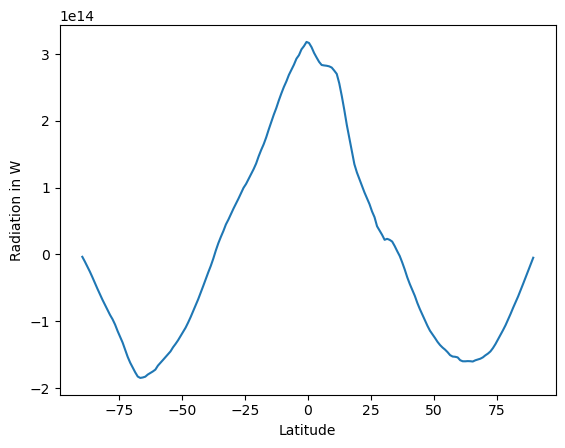

In [15]:
totalrad=ds_mean.toa_net_all_mon*ds_mean.area
totalrad.sum(dim='lon').plot()
plt.xlabel('Latitude')
plt.ylabel('Radiation in W')

## 4.3) Plot the cumulative sum of the total amount of net radiation as a function of latitude

Text(0, 0.5, 'Radiation in W')

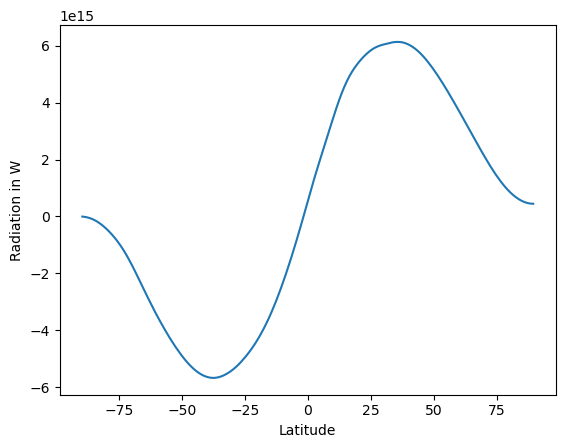

In [16]:
totalrad.sum(dim='lon').cumsum().plot()
plt.xlabel('Latitude') 
plt.ylabel('Radiation in W')

## 5) Selecting and Merging Data
5.1) Create a Dataset for each point from the global dataset

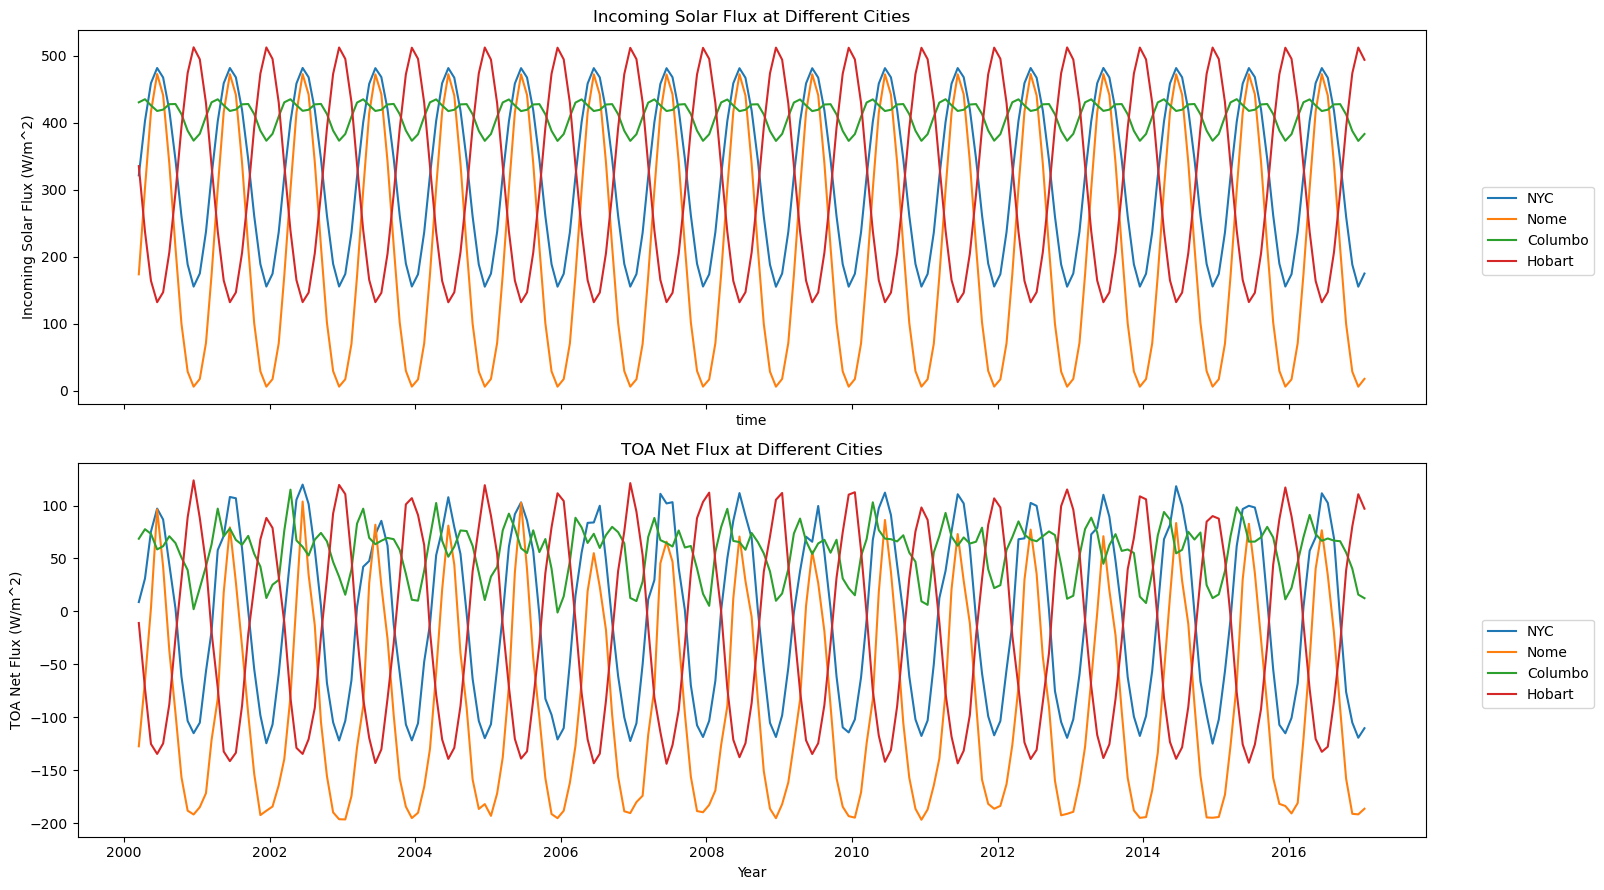

In [32]:
#dataset of the 4 cities from global dataset
NYC = ds.sel(lon=(360-74), lat=40, method='nearest')
Nome = ds.sel(lon=(360-165), lat=64, method='nearest')
Columbo = ds.sel(lon=80, lat=7, method='nearest')
Hobart = ds.sel(lon=147, lat=-43, method='nearest')

# Tmeseries plots
fig, ax = plt.subplots(nrows=2, figsize=(16, 9), sharex=True)

# timeseries for the Incoming solar fluxes for each city with legend set out of plotting box
NYC.solar_mon.plot(ax=ax[0], label='NYC')
Nome.solar_mon.plot(ax=ax[0], label='Nome')
Columbo.solar_mon.plot(ax=ax[0], label='Columbo')
Hobart.solar_mon.plot(ax=ax[0], label='Hobart')
ax[0].set_title('Incoming Solar Flux at Different Cities')
ax[0].set_ylabel('Incoming Solar Flux (W/m^2)')
ax[0].legend(loc='upper right', bbox_to_anchor=(1.13, 0.6),fancybox=True, ncol=1)

# TOA net radiation flux timeseries
NYC.toa_net_all_mon.plot(ax=ax[1], label='NYC')
Nome.toa_net_all_mon.plot(ax=ax[1], label='Nome')
Columbo.toa_net_all_mon.plot(ax=ax[1], label='Columbo')
Hobart.toa_net_all_mon.plot(ax=ax[1], label='Hobart')
ax[1].set_title('TOA Net Flux at Different Cities')
ax[1].set_ylabel('TOA Net Flux (W/m^2)')
ax[1].legend(loc='upper right', bbox_to_anchor=(1.13, 0.6),fancybox=True, ncol=1)
plt.xlabel('Year')
plt.tight_layout()
plt.show()

## 5.2) Merge these four datasets into a new dataset with the new dimension city
Create a new dimension coordinate to hold the city name. Display the merged dataset.

In [30]:
merged_dataset = xr.concat([NYC, Nome, Columbo, Hobart], dim='city')
merged_dataset

<xarray.Dataset>
Dimensions:                      (city: 4, time: 203)
Coordinates:
    lon                          (city) float32 286.5 195.5 80.5 147.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
    lat                          (city) float32 40.5 64.5 7.5 -42.5
Dimensions without coordinates: city
Data variables: (12/14)
    toa_sw_all_mon               (city, time) float32 89.36 155.3 ... 137.6
    toa_lw_all_mon               (city, time) float32 223.2 216.2 ... 259.2
    toa_net_all_mon              (city, time) float32 8.813 31.08 ... 97.02
    toa_sw_clr_mon               (city, time) float32 38.75 47.61 ... 75.11
    toa_lw_clr_mon               (city, time) float32 253.2 259.4 ... 284.6
    toa_net_clr_mon              (city, time) float32 29.48 95.62 ... 134.2
    ...                           ...
    toa_cre_net_mon              (city, time) float32 -20.66 -64.55 ... -37.13
    solar_mon                    (city, time) float32 321.4 402.6 ... 493.8
    cldarea_total_daynight_mon   (city, time) float32 56.61 71.12 ... 46.37
    cldpress_total_daynight_mon  (city, time) float32 574.6 510.1 ... 641.1
    cldtemp_total_daynight_mon   (city, time) float32 250.3 247.7 ... 265.2
    cldtau_total_day_mon         (city, time) float32 5.157 11.39 ... 6.653
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

## 5.3) Plot the incoming solar and net radiation at each city
Make two separate plots. Try to have your legend created automatically from the data.

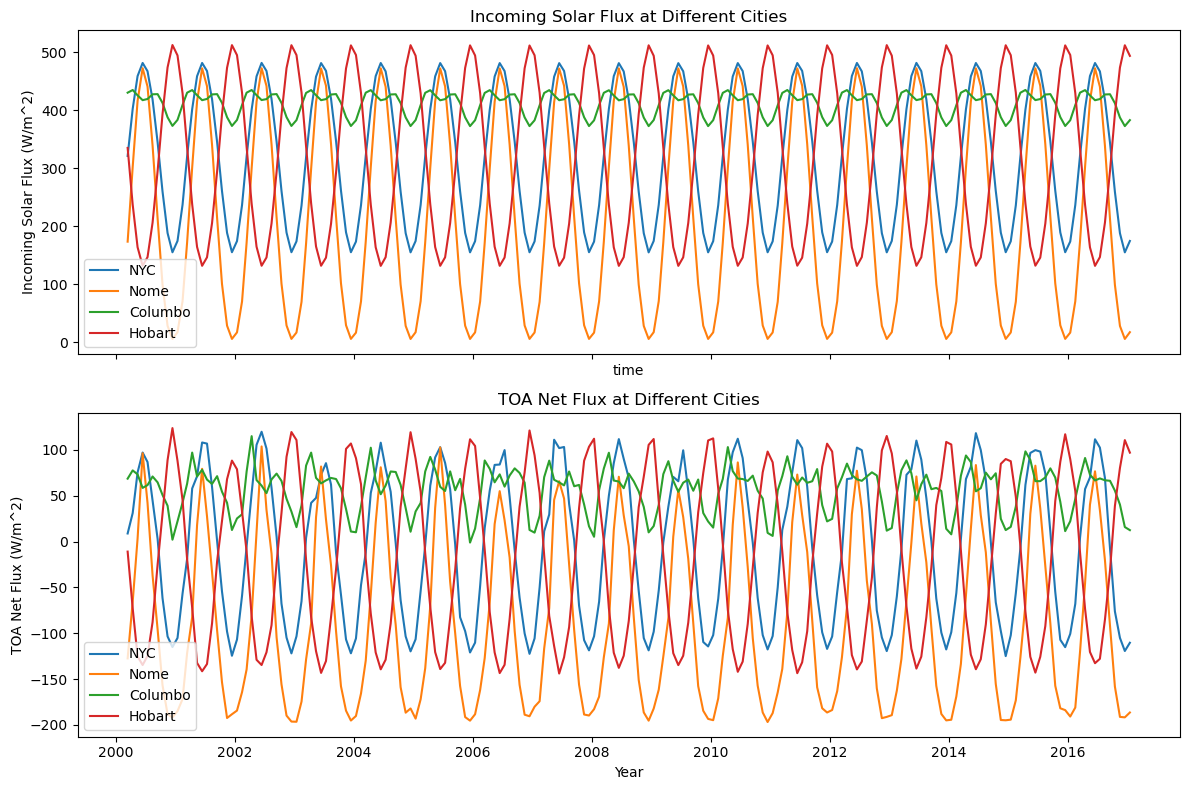

In [31]:
# Tmeseries plots
fig, ax = plt.subplots(nrows=2, figsize=(12, 8), sharex=True)

# timeseries for the Incoming solar fluxes for each city with automatic legend from plt
NYC.solar_mon.plot(ax=ax[0], label='NYC')
Nome.solar_mon.plot(ax=ax[0], label='Nome')
Columbo.solar_mon.plot(ax=ax[0], label='Columbo')
Hobart.solar_mon.plot(ax=ax[0], label='Hobart')
ax[0].set_title('Incoming Solar Flux at Different Cities')
ax[0].set_ylabel('Incoming Solar Flux (W/m^2)')
ax[0].legend()

# TOA net radiation flux timeseries
NYC.toa_net_all_mon.plot(ax=ax[1], label='NYC')
Nome.toa_net_all_mon.plot(ax=ax[1], label='Nome')
Columbo.toa_net_all_mon.plot(ax=ax[1], label='Columbo')
Hobart.toa_net_all_mon.plot(ax=ax[1], label='Hobart')
ax[1].set_title('TOA Net Flux at Different Cities')
ax[1].set_ylabel('TOA Net Flux (W/m^2)')
ax[1].legend()
plt.xlabel('Year')
plt.tight_layout()
plt.show()